<a href="https://colab.research.google.com/github/qusai238/Algorithmic-run-time-O-n-/blob/main/ADS_Assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

**NOTE: Run times,Slopes and y-intercept might change slightly each time the cell is run, this change is insignificant and will not change the results obtained drasticly.**

In this report the behavior of different algorithms will be tested as the input size is varied, in other words the time complexity of different similarity algorithms will be tested against the size of input taken, and how each algorithm behaves when inputs become larger. The input is going to be a corpus imported from nltk library, which is a well known library for natural language processing purposes,the gutenberg corpus which is made up of 18 documents will be the data which the investigation will be carried out on. Different similarity algorithms will be investigated,similarity will be compared between the documents, also the data structures used to investigate them will be varied to check out which data structre gives better results in terms of time complexity. lastly a parallel computing paradigm will be used to find the all pair similarity of all the 18 documents in the Gutenberg corpus,In the current case map reduce parallel computing paradigm was used. So, this report will mainly cover Jaccard's and Cosine similarity algorithms, and finally the map reduce algorithm.Similarity is an iteresting topic, as it is being used in many technological applications nowadays, such as plagirism, documents retrieval,movie recommender systems and many more. 

In [ ]:
#Importing essential libraries 

import nltk 
import numpy as np 
import pandas as pd 
import scipy 
import scipy.stats as stats
import matplotlib.pyplot as plt
import time
from timeit import default_timer as timer
import math 
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
import sys

#Question one (Jaccard's Similarity)
$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

In [ ]:

#importing the gutenberg corpus

nltk.download('gutenberg')
from nltk.corpus import gutenberg
len(gutenberg.fileids())

#so it can be noticed that we have 18 documents inside of the gutenberg corpus

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


18

In [ ]:
#These are the names of the documents in the corpus

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
#Checking out how many words each document is made up of in the corpus

for i in gutenberg.fileids():
  print(len(gutenberg.words(i)))

192427
98171
141576
1010654
8354
55563
18963
34110
96996
86063
69213
210663
260819
96825
25833
37360
23140
154883


In [ ]:
#Changing the concatenated corpus view into a list of lists of words 

words_list=[[word for word in  gutenberg.words(doc)]for doc in gutenberg.fileids()]
words_list[0]


['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 '

In [ ]:
#Creating a dictionary of counts for each word in our document to use in the jaccard similarity algorithm 

def make_dict(tokenlist):
    res_dict={}
    for token in tokenlist:
        res_dict[token]=res_dict.get(token,0)+1
    return res_dict

dict_representation=[]
for word in words_list:
  dict_representation.append(make_dict(word))
dict_representation

#As it can be seen that the output is a dictionary of counts , and that is going to be used in the Jaccard's similarity algorithm

[{'[': 2,
  'Emma': 865,
  'by': 558,
  'Jane': 301,
  'Austen': 1,
  '1816': 1,
  ']': 1,
  'VOLUME': 3,
  'I': 3178,
  'CHAPTER': 55,
  'Woodhouse': 313,
  ',': 11454,
  'handsome': 37,
  'clever': 27,
  'and': 4672,
  'rich': 14,
  'with': 1187,
  'a': 3004,
  'comfortable': 34,
  'home': 130,
  'happy': 122,
  'disposition': 24,
  'seemed': 141,
  'to': 5183,
  'unite': 3,
  'some': 248,
  'of': 4279,
  'the': 4844,
  'best': 85,
  'blessings': 6,
  'existence': 8,
  ';': 2199,
  'had': 1606,
  'lived': 25,
  'nearly': 14,
  'twenty': 30,
  '-': 574,
  'one': 413,
  'years': 57,
  'in': 2118,
  'world': 81,
  'very': 1151,
  'little': 354,
  'distress': 19,
  'or': 490,
  'vex': 1,
  'her': 2381,
  '.': 6928,
  'She': 562,
  'was': 2385,
  'youngest': 4,
  'two': 171,
  'daughters': 7,
  'most': 243,
  'affectionate': 9,
  'indulgent': 2,
  'father': 207,
  'consequence': 27,
  'sister': 33,
  "'": 1007,
  's': 933,
  'marriage': 34,
  'been': 759,
  'mistress': 11,
  'his': 1088,


In [ ]:
#The jaccard Similarity Algorithm which takes two documents represented as dictionaries of counts of words 

def maketotal(dict1):
    total=0
    for item in dict1:
        total += dict1[item]
    return total

def jaccard(dict1,dict2):
    intersection={}
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
            
    intersectiontot=maketotal(intersection)
    union = maketotal(dict1)+maketotal(dict2)-intersectiontot
    return intersectiontot/union

jaccard(dict_representation[0],dict_representation[1]) # it can be noticed here that the similarity between the two first documents is almost 0.45

0.4487812903515288

In [ ]:
#Function to plot relationship between time and input size first one plot is the realationship between the two variables and the second one is a logarithmic plot of the relationship. 

def plots(lst_len,timing,Alg_name):
    logxs=[np.log10(x) for x in lst_len]
    logys=[np.log10(y) for y in timing]
    
    plt.subplots_adjust(1,0,2.5,0.5)
    plt.subplot(121)
    plt.plot(lst_len,timing)
    plt.xlabel("Length of input")
    plt.ylabel("Run Time")
    plt.title("Running Time of "+ Alg_name)
    #plt.ylim(-6,-3)
    
    plt.subplot(122)
    plt.scatter(logxs,logys)
    plt.xlabel("Length of input")
    plt.ylabel("Run Time")
    plt.title("Running Time of "+ Alg_name)
    plt.show()
    
    return logxs,logys


In [ ]:
#Function to calculate the slope and the y-intercept of  log graphs using scipy library

def slope(logxs, logys):
    slope, intercept, r_value, p_value, std_err = stats.linregress(logxs, logys)
    print(f'the slope is {slope} and the y-intercept is {intercept}')

In [ ]:
#Time function which calculates the average run time for a passed function 

def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
 
    return mean

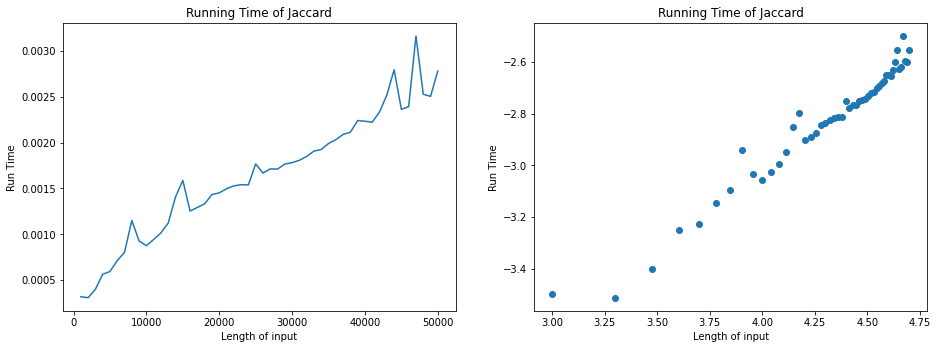

the slope is 0.6005393784162971 and the y-intercept is -5.413396064358092


In [ ]:
#Testing the time complexity for Jaccard's algorithm vs document length
#50000 words will be used with a length of 1000 each time.

plt.figure(figsize=(8,8))

time_jaccard = []
lst_len = []
for n in range(1000, 50001, 1000):
    
    A = make_dict(gutenberg.words()[:n])
    B = make_dict(gutenberg.words()[n:2*n])
    

    run_time=timeit(jaccard,A,B)
    lst_len.append(n)
    time_jaccard.append(run_time)

x,y=plots(lst_len,time_jaccard,'Jaccard')
slope(x,y)

##Explanation of the Jaccard's Similarity emprical findings

The Jaccard similarity is used to measure the similarity between two sets of inputs, as it was shown previously the mathematical representation of Jaccard's similarity is the intersection of two sets devided by the Union of them.For the coding part the Jaccard algorithm has a theoritical time complexity of O(n) if dictionaries or bags of words are being used,on the other hand if lists are being used the time complexity becomes O(n^2) because the if function runs twice to check if an element is in both lists, and the if statement has a constant run time of O(n), while when we use python dictionaries which are implemented using hash tables the if function only checks the what is stored at the hash of the item and that takes O(n) while the for statement takes O(n) to run. So in this case since dictionaries of counts are being used the theoritical run time is O(n) and the empricl run time should be close to that. 

to explain the empirical outputs after running the Jaccard algorithm on an input size of 50000 words from the gutenberg corpus the following charts were produced, the first one is almost behaving linearly as the input size increases, the second chart is the log of the first one.Using basic maths to find the time complexity, since the first graph is linear so if the log of both sides was taken then $y=c_a x^n$ is also $\log(y) = \log(c_a) + n \log(x)$, therefore, from the log graph the y-intercept is -5.41 and the slope is 0.601, that concludes that $𝑐𝑎=10^{−5.66}$ and n=0.656 , so $y=10^{−5.41} x^{0.601}$ so the empirical time complexity in this case is $O(n^{0.601})$, which is slightly better than $O(n^{1})$. This result is not the worst case though, the for loop has O(n) time complexity and the if statement has a constant time, so as the input size increases time complexity will also increase as proven by the graph, but unfortunately computing power is not enough to test on bigger sizes. but the empirical findings support the theory that jaccard's algorithm has a time complexity of O(n), so as the input size increases the time complexity will increase keeping in mind dictionaries are being used.

#Cosine Similarity (Dense/Vector Representation)
$cos(V1,V2) = \cfrac{V1\cdot V2}{\sqrt{V1\cdot V1 * V2\cdot V2}}$

---



In [ ]:
#This is function which turns the dictionary representation into a matrix form to use in the Cosine Similarity Algorithm

def make_matrix(list_of_dicts):
    #first of all make a list of all of the features that occur in any document - these will be the dimensions of the matrix
    allfeatures={}    
    for docdict in list_of_dicts:
        for feat in docdict.keys():
            allfeatures[feat]=1
    
    dimensions=list(allfeatures.keys())
    #don't strictly need to sort it - but it is good practise to make sure it is reproducible
    sorted(dimensions)
    
    matrix=[]
    #each row in the matrix will be one of the dimensions
    for dimension in dimensions:
        row=[]
        #look up the appropriate value for each document
        for docdict in list_of_dicts:
            row.append(docdict.get(dimension,0)) #this will append the document's value if present, 0 otherwise
        matrix.append(row)
        
        
    return matrix

## it might be useful to be able to transpose a matrix so we can compare documents
def transpose(matrix):
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])
        
    return transposed

In [ ]:
#The Cosine Similarity Algorithm using vector multiplication

def sqrt_cos(V):
  sqrt_sum=0
  for i in range(len(V)):
    sqrt_sum+=V[i]**2
  return sqrt_sum**0.5

def cosine_original(V1,V2):
  dot_product=0
  for i in range(len(V1)):
    dot_product+=V1[i]*V2[i]

  vector1=sqrt_cos(V1)
  vector2=sqrt_cos(V2)

  return dot_product/(vector1*vector2)

In [ ]:
#Investagating the runtime vs input length using cosine similarity of vector multiplication 

time_cos=[]
for n in range (1000,50001,1000):
  V1= make_dict(gutenberg.words()[:n])
  V2= make_dict(gutenberg.words()[n:2*n])

  Mat=np.array(transpose(make_matrix([V1,V2])))

  run_time_cos= timeit(cosine_original,Mat[0],Mat[1])
  time_cos.append(run_time_cos)

In [ ]:
#the size that the list of lists(Matrix) in bytes 

sys.getsizeof(Mat)

92144

##Cosine Similarity using Numpy 

In [ ]:
def square_root(v):
  square_root_sum=0
  for x in range(len(v)):
    square_root_sum=square_root_sum + v[x]**2
  return square_root_sum**0.5

In [ ]:
#Cosine Similarity Algorithm using numpy 

def cosine_numpy(v1,v2):

  dot_product=0

  dot_product=np.dot(v1,v2)

  vector1= square_root(v1)
  vector2= square_root(v2)

  return dot_product/(vector1*vector2)


In [ ]:
#Investigating runtime of Cosine similarity using numpy dot product 

time_cos_numpy= []

for n in range (1000,50001,1000):
  v1=make_dict(gutenberg.words()[:n])
  v2=make_dict(gutenberg.words()[n:2*n])

  Mat_np= np.array(transpose(make_matrix([v1,v2])))

  run_time_cos_np=timeit(cosine_numpy,Mat_np[0],Mat_np[1])
  time_cos_numpy.append(run_time_cos_np)

In [ ]:
df=pd.DataFrame(Mat_np)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5712,5713,5714,5715,5716,5717,5718,5719,5720,5721,5722,5723,5724,5725,5726,5727,5728,5729,5730,5731,5732,5733,5734,5735,5736,5737,5738,5739,5740,5741,5742,5743,5744,5745,5746,5747,5748,5749,5750,5751
0,1,229,135,8,1,1,1,1,749,15,84,2945,20,16,1323,6,338,926,15,36,27,12,17,1306,1,70,1190,1237,22,2,3,561,369,8,1,12,189,119,26,574,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,185,140,108,0,0,0,1,772,14,83,2943,12,1,1217,3,272,705,9,34,31,7,33,1320,0,57,1133,1350,26,0,2,661,414,9,5,8,148,107,15,524,...,1,1,1,1,1,1,2,1,4,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#the size in bytes that the numpy array takes 

sys.getsizeof(Mat_np)

92144

###Comparing the running time of the two Cosine Similarity Methods

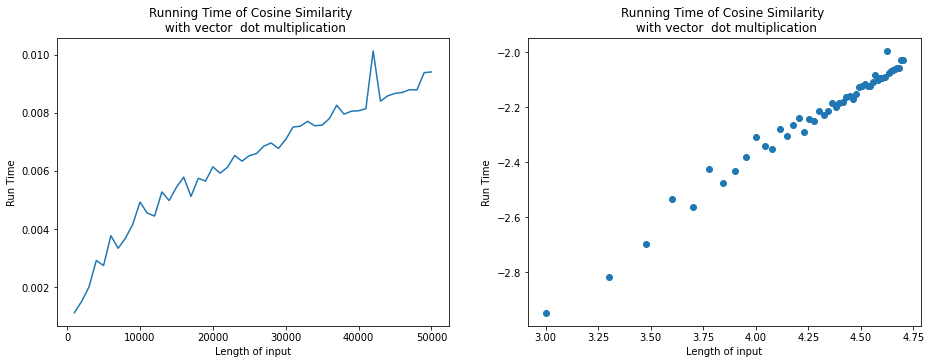

the slope is 0.51576532459819 and the y-intercept is -4.447715772781815


In [ ]:
#Cosine Similarity using vector multiplicatoin

plt.figure(figsize=(8,8)) 

x,y= plots(lst_len,time_cos,'Cosine Similarity \n with vector  dot multiplication')
slope(x,y)

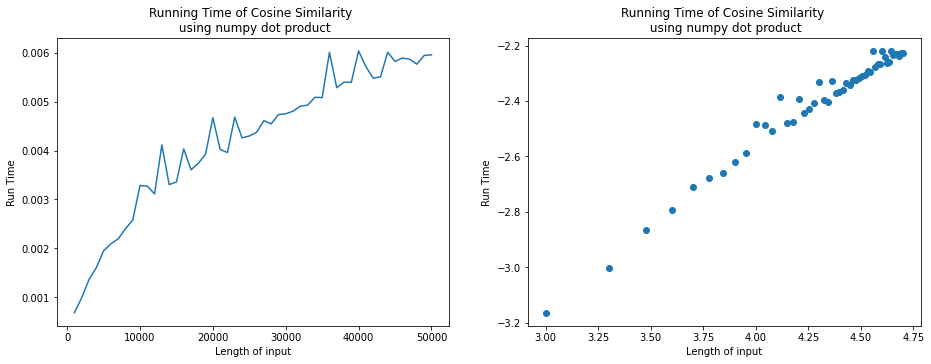

the slope is 0.533485725758785 and the y-intercept is -4.700473755235267


In [ ]:
#Cosine Similarity using numpy dot product

plt.figure(figsize=(8,8))

x,y=plots(lst_len,time_cos_numpy,'Cosine Similarity \n using numpy dot product')
slope(x,y)

Text(0.5, 0, 'length of Matrix')

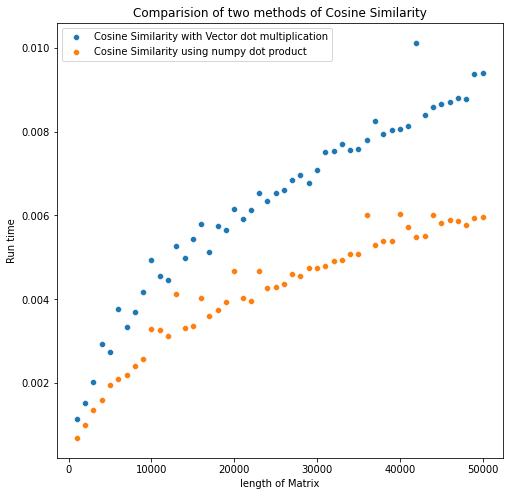

In [ ]:
#comparision of the runtime of the previously mentioned cosine similarity methods

plt.figure(figsize=(8,8))

import seaborn as sns 
sns.scatterplot(lst_len,time_cos)
sns.scatterplot(lst_len,time_cos_numpy)

plt.title('Comparision of two methods of Cosine Similarity')
label=['Cosine Similarity with Vector dot multiplication', 'Cosine Similarity using numpy dot product']
plt.legend(label)
plt.ylabel('Run time')
plt.xlabel('length of Matrix')

Cosine similarity measures the similarity between two vectors or matrices by finding the dot product of the two inputs and diviing that by the square root of each vector multiplied by itself.In the previous code blocks under the titile cosine similarity two cosine similarity methods were used, the first one uses a defined dot product function while the other one uses numpy's np.dot built in method and the input is a numpy array, from the empirical investigation and comparision we can note that the numpy method was a bit faster and both methods follow a linear behavior, and both of them take inputs as dense/vector representatoin. for the cosine vector multiplicatoin it has a single for loop which iterates over every single element in the two matrices which has time complexity of O(n), the numpy dot product defined function also has a single for loop to calculate the square root, it should be noticed that most numpy library functions are written using the programming language C, and the numpy array representation is more compact and takes less memory,which makes them faster than python list of lists that was used with the regular cosine similarity , that also affects the O(n), this could be a possible reason why numpy dot is faster than the original cosine. Now since both methods follow a linear behavior if we take the log of both sides in the same manner done with Jaccard's similarity we can conclude that the run time of cosine with vector dot multiplication is $O(n^{0.515})$ and for the nump dot product the run time is $O(n^{0.533})$, again this is not the worst running time as only 50000 words represented as matrices were tested, if the input size is increased the run time will also increase as shown by the trends in the graphs,so the worst case for running time would follow the trend that if the input size icreases the time will also increase,insufficient computing power restricted the testing of more than 50000 words.From this comparision it can be concluded that using numpy dot product is faster than python dot product , mainly because numpy was built using language C and it also was built by professional programmers to optimize the use of various mathematical operations in python rather than using python's traditional operators which can be slower.

#Cosine Similarity (Sparse/Dictionary Representation)

In [ ]:
# Sparse/Dictionary Representation 
#the make_dict function will be used to produce a dictionary representation 

sparse1=make_dict(gutenberg.words())
print(sparse1)
type(sparse1)

{'[': 115, 'Emma': 866, 'by': 8012, 'Jane': 303, 'Austen': 3, '1816': 1, ']': 105, 'VOLUME': 3, 'I': 30221, 'CHAPTER': 291, 'Woodhouse': 313, ',': 186091, 'handsome': 130, 'clever': 74, 'and': 78846, 'rich': 231, 'with': 16827, 'a': 32504, 'comfortable': 108, 'home': 677, 'happy': 537, 'disposition': 73, 'seemed': 1083, 'to': 46443, 'unite': 17, 'some': 2560, 'of': 70078, 'the': 125748, 'best': 574, 'blessings': 24, 'existence': 47, ';': 27329, 'had': 10177, 'lived': 260, 'nearly': 137, 'twenty': 459, '-': 8850, 'one': 5755, 'years': 1011, 'in': 31959, 'world': 1222, 'very': 3852, 'little': 2825, 'distress': 111, 'or': 5901, 'vex': 24, 'her': 11153, '.': 73746, 'She': 1612, 'was': 18558, 'youngest': 42, 'two': 2268, 'daughters': 319, 'most': 1457, 'affectionate': 56, 'indulgent': 11, 'father': 1673, 'consequence': 132, 'sister': 592, "'": 19873, 's': 9792, 'marriage': 142, 'been': 3408, 'mistress': 137, 'his': 20585, 'house': 2850, 'from': 8647, 'early': 277, 'period': 64, 'Her': 366, 

dict

In [ ]:
#funtion to compute the dot product between two dictionaries (Cosine similarity using dictionaries not vectors):

def dot_dict(d1,d2):
    if len(d1) < len(d2):
        dict1= d1
        dict2= d2
    else:
        dict1= d2
        dict2= d1
    dot_product = 0
    for word,word_count in dict1.items():
        dot_product += word_count * dict2.get(word,0)
    return dot_product

def cos_sim_dict(d1,d2):
    num= dot_dict(d1,d2)
    deno= sqrt(dot_dict(d1,d1)*dot_dict(d2,d2))
    return num/deno

In [ ]:
#Iterating over the first 50000 words in gutenberg corpus and appending them into dictionaries to find their cosine similarity and compare the run time vs the document's length 
time_cos_sparse=[]

for n in range(1000,50001,1000):
  dict1=make_dict(gutenberg.words()[:n])
  dict2=make_dict(gutenberg.words()[n:2*n])

  run_time_sparse=timeit(cos_sim_dict,dict1,dict2)
  time_cos_sparse.append(run_time_sparse)

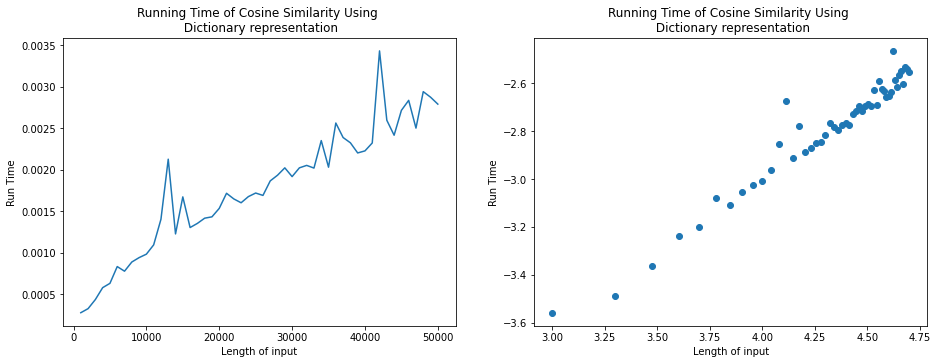

the slope is 0.6211505325805877 and the y-intercept is -5.4695604306206205


In [ ]:
#Plotting the graph of Cosine similarity using dictionary representation vs list(words) length 

plt.figure(figsize=(8,8))

sparse_x,sparse_y=plots(lst_len,time_cos_sparse,'Cosine Similarity Using \n Dictionary representation')
slope(sparse_x,sparse_y)

Text(0.5, 1.0, 'Comparision of all the similarity algorithms')

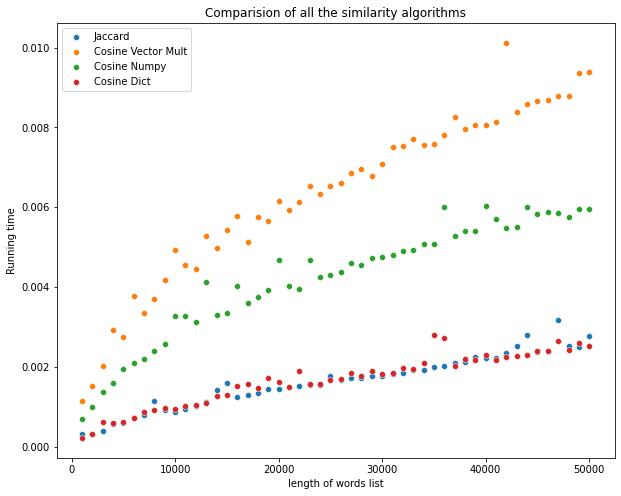

In [ ]:
#Comparision of the Runtime of all the previously mentioned similarity algorithms 

plt.figure(figsize=(10,8))

sns.scatterplot(lst_len,time_jaccard)
sns.scatterplot(lst_len,time_cos)
sns.scatterplot(lst_len,time_cos_numpy)
sns.scatterplot(lst_len,time_cos_sparse)

plt.xlabel('length of words list')
plt.ylabel('Running time')
label=['Jaccard','Cosine Vector Mult','Cosine Numpy', 'Cosine Dict']
plt.legend(label)
plt.title('Comparision of all the similarity algorithms')


This is the same Cosine similarity measure, but instead of using dense/vector representation a sparse/dictionary representation is being used as an input.Here the cosine_sim_dict function has a for loop  which is O(n) and an if and else statement which has a constant running time of O(1), so the theoritical run time of this algorithm should be O(n), which means as the dictionary input size increases the running time will also increase linearly as shown by the graph. This is also the case empirically, if we apply log to both sides of the equation as done previously we get a run time of $O(n^{0.621}) which is achieved by finding the similarity of 50000 words in chunks of 1000.This is also not the worst case for the same computing power reason, but the overall trend shows that as input size increases run time will also increase following O(n).

The comparision chart above shows that the four different algorithms used follow the same uptrend, which can be summarized as follows: regardless of the input size, as the input size increases the running time of the algorithm also increases almost in a linear behavior.Moreover, it can be noticed that Jaccard and Cosine similarity using dictionaries as inputs are doing almost the same and also the best compared to the other two cosine dense representations in terms of run time.This observation can be related to how the data is stored in both datastructres the dictionaries and the arrays(matrices). the dictionaries stores the count of each word in the document, while in the arrays alot of zero values can be found if a word is not found in the document , this takes extra unneccessary space , and that may be why the dictionary similarity methods are doing better than the matrices similarity methods, although the algorithms share the same theoritical running time of O(n), dictionaries seem to be doing better than matrices when it comes to measuring the run time of the similarities.To sum up, the four algorithms seem to handle data in different ways which affects the run time, the dictionaries are doing the best whether cosine or jaccard similarity is being used.   

#Function to compute all pairs similarity 

In [ ]:
#This is vector representatoin of the documents by using the functions mentioned above. 

amatrix=make_matrix(dict_representation)
docvectors=transpose(amatrix)
docvectors

[[2,
  865,
  558,
  301,
  1,
  1,
  1,
  3,
  3178,
  55,
  313,
  11454,
  37,
  27,
  4672,
  14,
  1187,
  3004,
  34,
  130,
  122,
  24,
  141,
  5183,
  3,
  248,
  4279,
  4844,
  85,
  6,
  8,
  2199,
  1606,
  25,
  14,
  30,
  574,
  413,
  57,
  2118,
  81,
  1151,
  354,
  19,
  490,
  1,
  2381,
  6928,
  562,
  2385,
  4,
  171,
  7,
  243,
  9,
  2,
  207,
  27,
  33,
  1007,
  933,
  34,
  759,
  11,
  1088,
  95,
  535,
  40,
  18,
  88,
  72,
  4,
  253,
  144,
  32,
  1321,
  1301,
  464,
  415,
  452,
  1,
  8,
  1,
  92,
  5,
  33,
  129,
  1387,
  9,
  281,
  7,
  67,
  50,
  2,
  592,
  48,
  1153,
  77,
  68,
  177,
  39,
  83,
  1148,
  46,
  2,
  4,
  2128,
  20,
  12,
  10,
  243,
  6,
  14,
  1,
  16,
  1,
  36,
  71,
  40,
  1,
  651,
  3,
  2,
  6,
  356,
  273,
  55,
  138,
  392,
  17,
  81,
  3,
  25,
  45,
  159,
  434,
  1778,
  16,
  24,
  1,
  29,
  6,
  7,
  301,
  357,
  41,
  10,
  181,
  64,
  591,
  41,
  145,
  145,
  478,
  155,
  380,
  31

In [ ]:
#This is a function which computes all pairs similarity of all the documents in the corpus which takes list of dictionaries as input and the similarity algorithm which is going to be used.

def All_similarity(list_of_dicts,sim_measure):
  sims=[]
  all_times=[]
  docs=[]
  num1=0
  num2=0

  for docA in list_of_dicts:
      rowsims=[]
      for docB in list_of_dicts:
          start=time.time()
          sim=sim_measure(docA,docB)
          end=time.time()
          num1=num1+(end-start)
          all_times.append(num1)
          num2+=1
          docs.append(num2)
          rowsims.append(sim)
      sims.append(rowsims)
    
  print(sims)

  maxsim=0
  minsim=2
  maxi=-1
  maxj=-1
  mini=-1
  minj=-1

  for i in range(0,len(sims)):
      for j in range(0,len(sims)):
          if i != j:
              if sims[i][j]>maxsim:
                  maxsim=sims[i][j]
                  maxi=i
                  maxj=j
              if sims[i][j]<minsim:
                  minsim=sims[i][j]
                  mini=i
                  minj=j

  return docs , all_times , (minsim,mini,minj), (maxsim,maxi,maxj)


In [ ]:
e,f,g,h=All_similarity(dict_representation,cos_sim_dict)

[[1.0, 0.9760888427113167, 0.9810839188178181, 0.8024303234599484, 0.8547481279029794, 0.9130848242018449, 0.8601458234735888, 0.825656368732555, 0.9146017299713048, 0.9091987760805239, 0.9103843111796669, 0.961473214366128, 0.9095142792348461, 0.8283975933653441, 0.8599987629243648, 0.8782887672957751, 0.8471735083234065, 0.8257706508151519], [0.9760888427113167, 1.0, 0.9850692510919175, 0.8413904213996611, 0.8835911043034884, 0.929556093553669, 0.8509087121861851, 0.8365170705043209, 0.915252647526431, 0.9162689388393801, 0.9091203541134067, 0.961670495004333, 0.9409544086921577, 0.8796189379304222, 0.8494020729895138, 0.8678447976810003, 0.842190910018952, 0.8729297158870131], [0.9810839188178181, 0.9850692510919175, 1.0, 0.8183718601369668, 0.8745548752773142, 0.9163761400144171, 0.841595557416512, 0.8357829449035704, 0.906180962059666, 0.9046052348338631, 0.9009356043873404, 0.965454425092325, 0.9245870273443286, 0.8643105760126448, 0.8539807072787489, 0.872123083521122, 0.8437797

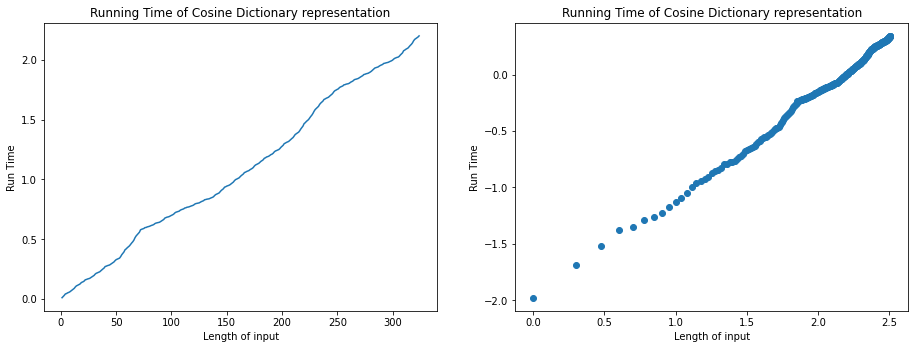

the slope is 0.9531943326375916 and the y-intercept is -2.0699129333366075


In [ ]:
plt.figure(figsize=(8,8))
e_all,f_all=plots(e,f,'Cosine Dictionary representation')
slope(e_all,f_all)

In [ ]:
g,h

((0.6871519780112535, 6, 13), (0.9895406963050145, 8, 10))

In [ ]:

a,b,c,d=All_similarity(dict_representation,jaccard)

[[1.0, 0.4487812903515288, 0.6127385890112649, 0.1321485000277607, 0.03327054900265547, 0.22441220906694054, 0.07723981185631366, 0.13832540236873708, 0.35886360328467665, 0.3279830622433944, 0.2742600826973559, 0.5677481584044431, 0.4265445057487182, 0.27293691029432476, 0.08577881472711263, 0.1217548792751628, 0.07575341713783829, 0.33966696367612853], [0.4487812903515288, 1.0, 0.5753448060609645, 0.0751491774634886, 0.05993970209251649, 0.37821167948648987, 0.14494892722740824, 0.24120103213699273, 0.4738483612747319, 0.47682565130260524, 0.43422416821613097, 0.38409895576569714, 0.2937182642790473, 0.34469798842846405, 0.15126588742096908, 0.20325470316148334, 0.1336523096188171, 0.31400650112679274], [0.6127385890112649, 0.5753448060609645, 1.0, 0.10402601608566758, 0.043826365440178226, 0.28876816568279434, 0.10342907808730437, 0.1810505935974831, 0.43121445540277875, 0.4056909615230238, 0.34955055316533495, 0.4983282855781665, 0.38013527140025105, 0.32182837372544454, 0.11155449

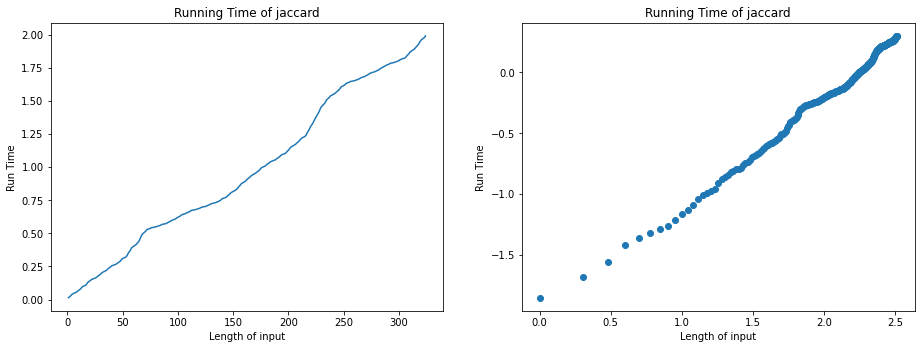

the slope is 0.9336670689727528 and the y-intercept is -2.072723136606021


In [ ]:
plt.figure(figsize=(8,8))

a_all,b_all=plots(a,b,'jaccard')
slope(a_all,b_all)

In [ ]:
#Lowest and highest jaccard Similarity respectively 

c,d 

((0.007082133376554838, 3, 4), (0.6316291423783803, 8, 9))

In [ ]:
#length of all documents compared together which is 18*18=324

len(a)


324

Text(0.5, 1.0, 'Comparision of all document pair similarity between jaccard \n and cosine dictionary representation')

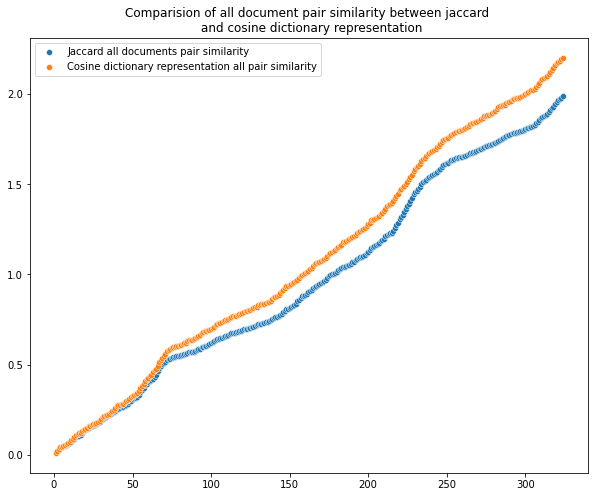

In [ ]:
#comparision plot of Jaccard and cosine dense representation of all documents pairs 

plt.figure(figsize=(10,8))

sns.scatterplot(a,b)
sns.scatterplot(e,f)
label2=['Jaccard all documents pair similarity','Cosine dictionary representation all pair similarity']

plt.legend(label2)
plt.title('Comparision of all document pair similarity between jaccard \n and cosine dictionary representation')

The all similarity function takes in two parameters, the first one is a a list of dictionaries, and the second parameter is the method of similarity that is going to be used, since the input is a list of dictionaries two similarity methods were compared, the cosine dictionary representatoin and the Jaccard similarity. from the above graph it can be seen that the Jaccard similarity is doing slightly better than the cosine similarity when input size increases gradually, and since all documents in the corpus are being compared against each other the input size is going to be 18*18 documents which eqaul to a total of 324 comparisions, so that is the input size that was plot against the running time to compare all documents in the corpus.It can be noticed that both methods follow the same linear uptrend which means as the input size increases the running time will also increase, using the same logarithmics as previously described we can get the approximate time complexities in O(n) notation of both similarity algorithms. Cosin all pair similarity had a running time of $O(n^{0.953})$ and Jaccard all pair document similarity had a running tome of $O(n^{0.934})$, which is almost close to the theoritical run time of both methods O(n).
Now to compute the run time for all pair similarity of 200k documents, by doing some maths $y=c_a.x^n$ then $\log(y) = \log(c_a) + n\log(x)$ since its almost a linear relationship, the y-intercept for jaccard is -2.07 so  $𝑐𝑎≈10^{−2.07}$ so according to that $y=10^{-2.07}(200000)^{0.934} \approx 760 $ that was for jaccard. Now doing the same thing for cosine all pair similarity we get $y=10^{-2.07}(200000)^{0.953} \approx 959 $. And from that calculation it can be seen that Jaccard algorith for all pair similarity measure outpreforms Cosine all pair similarity measure when comparing very large inputs of documents, but in the case studied it only took into consideration 18 documents which is much less than 200k documents and thats why both methods were almost doing the same.

#Using the Map reduce computing paradigm to compute all pair similarity 

In [ ]:
#all similarity function to use it in the map reduce function with multi pool processes 

def all_similarity(input):
    sims= []
    for docA in range(len(dict_representation)-1):
        sims.append([])
        for docB in range(docA+1, len(dict_representation)):
            sims[docA].append([docA,docB])
    return sims

In [ ]:
#Mapper function to use it in the map reduce fucntion with multi pool processes 

def my_mapper(input):
     output=[]
    
     for num in input:
        output.append((str(num[0]),num))

     return output

In [ ]:
#function to find the intersection between two documents to be used in Jaccard's reducer function

def intersection(dict1,dict2):
  intersectiondict={}
  for item in dict1.keys():
    if item in dict2.keys():
      intersectiondict[item]=min(dict1[item],dict2[item])
  
  intersectiontot=maketotal(intersectiondict)

  return intersectiontot

In [ ]:
#jaccard similarity reducing function 

def reducer_jac(input):
  outputs=[]
  (word,counts)=input

  for count in counts:

    dict1=dict_representation[count[0]]
    dict2=dict_representation[count[1]]
    intersections=intersection(dict1,dict2)
    Union=maketotal(dict1)+maketotal(dict2)-intersections
    jaccards=intersections/Union

    outputs.append(((count[0],count[1]),jaccards))
  
  return outputs


In [ ]:
#Map reduce paradigm with multi map and reduce pool processes
#This is the main map and reduce function which takes the mapper function and the reducer function defined before
#the mapprocesses and reduceprocesses can be altered for optimal results  

from multiprocessing import Pool
from collections import defaultdict

def map_reduce_paradigm(documents,mapper,reducer,mapprocesses,reduceprocesses):
  outputs=[]
  collector=defaultdict(list)

  document=all_similarity(documents)

  #mapping stage
  mappool=Pool(processes=mapprocesses)
  map_results=mappool.map(mapper,document)
  mappool.close()

  #Collection stage
  collector=defaultdict(list)
  for result in map_results:
    for (key,value) in result:
      collector[key].append(value)

  #Reducing stage 
  reducepool=Pool(processes=reduceprocesses)
  reduce_results=reducepool.map(reducer,collector.items())
  reducepool.close()
  for result in reduce_results:
    outputs+=result

  return outputs


In [ ]:
#Timeit function to be used to output the mean time and std of the map reduce multi processes function 

def timeit_map_reduce(somefunc,*args,**kwargs):
    times=[]
    repeats=10
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
    error=stdev/(repeats**0.5)
 
    return (ans,mean,error)

In [ ]:
#Trying different number of map and reduce processes to check out which combination yields the best output 

ans,mean,std=timeit_map_reduce(map_reduce_paradigm,dict_representation,my_mapper,reducer_jac,mapprocesses=1,reduceprocesses=1)
mean,std

(1.2719268083572388, 0.012371475342421605)

In [ ]:
 
ans,mean,std=timeit_map_reduce(map_reduce_paradigm,dict_representation,my_mapper,reducer_jac,mapprocesses=1,reduceprocesses=2)
mean,std

(1.0440184831619264, 0.015311918696138306)

In [ ]:
ans,mean,std=timeit_map_reduce(map_reduce_paradigm,dict_representation,my_mapper,reducer_jac,mapprocesses=3,reduceprocesses=1)
mean,std

(1.1543051958084107, 0.022639719563838645)

In [ ]:
#This will be the choice of number of map and reduce processes as it gives the least mean run time and a reasonable error
ans,mean,std=timeit_map_reduce(map_reduce_paradigm,dict_representation,my_mapper,reducer_jac,mapprocesses=2,reduceprocesses=2)
mean,std

(1.0155522584915162, 0.005522375897432011)

In [ ]:
ans,mean,std=timeit_map_reduce(map_reduce_paradigm,dict_representation,my_mapper,reducer_jac,mapprocesses=3,reduceprocesses=2)
mean,std

(1.0447006940841674, 0.008335290599433295)

In [ ]:
#Jaccard Similarity using map reduce paradigm similarity results

jaccard_all_pair_parallel=map_reduce_paradigm(dict_representation,my_mapper,reducer_jac,mapprocesses=2,reduceprocesses=2)
jaccard_all_pair_parallel[0] 


((0, 1), 0.4487812903515288)

In [ ]:
 #Putting the results into a pandas dataframe 

jac_df_parallel=pd.DataFrame(jaccard_all_pair_parallel,columns=['document_pair','Jaccard_similarity'])
jac_df_parallel

,document_pair,Jaccard_similarity
0,"(0, 1)",0.448781
1,"(0, 2)",0.612739
2,"(0, 3)",0.132149
3,"(0, 4)",0.033271
4,"(0, 5)",0.224412
...,...,...
148,"(14, 16)",0.520428
149,"(14, 17)",0.113915
150,"(15, 16)",0.436475
151,"(15, 17)",0.159550


In [ ]:
#Using the original Jaccard similarity function to loop over all the documents 

jac_original=[]
for x in range(len(dict_representation)-1):
  for y in range(x+1,len(dict_representation)):
    sim=jaccard(dict_representation[x],dict_representation[y])
    jac_original.append(sim)

In [ ]:
#Putting the similarity results of the original Jaccard algorithm into a pandas dataframe  

jac_original_df=pd.DataFrame(jac_original,columns=['Jaccard_similarity'])
jac_original_df

#If comparision is carried out between the original Jaccard similarity results VS Jaccard Similarity using the map reduce paradigm it can be noticed that the results are the same.

,Jaccard_similarity
0,0.448781
1,0.612739
2,0.132149
3,0.033271
4,0.224412
...,...
148,0.520428
149,0.113915
150,0.436475
151,0.159550


The map reduce paradigm is parallel computational method invented by google back in 2004, it basically speeds up the process of processing data by using clusters of computers and splitting the data into chunks for faster proecessing.
The mapreduce function is made from the map and reduce functions and the number of optimal processes can be chosen by varying the number of these processes, the map function takes in the input and splits it into a dictionary of key values pairs, then the same data is passed to the collector where shuffling of the data takes place in an organized manner, finally the reducer function part comes in where it sums values in order and returns the output. This method is very useful because the tasks are distributed to be processed by different nodes(computers) and the data is split into chunks that is why for very big data it is usefull to try implementing this method rather than traditoinal similarity methods.

In this study case the map reduce paradigm gave similar results to the original jaccard similarity as it can be seen from the pandas dataframe, also it gave almost the same time to the original jaccard, a noticable change in time can be seen when the input size is bigger , here the time difference is almost neglegible.

#Summary

In this report different similarity measures were invistigated versus their time complexity.Some important information was extracted in terms of run time, use of dictionaries is somehow more reliable than using arrays or matrices or lists , due to the way dictionaries were build on hash tables in python made them faster for the amount of input tested on.Moreover the Jaccard similarity was doing the best in all scenarios even with all pair similarity, so it might be the best choice to carry out similarity analysis on this kind of input size. Finally the map reduce paradigm is a very efficient methodology to use with big data , as it uses top of the shelf technology to process big data faster than traditional measures, the noticable difference in time complexity using map reduce can be noticed when big data is used on on a distributed processing framework such as hadoop which is recommended for use with big data. It is very important to know the effeciency of code in terms of time and space complexity when running big data as this migh save alot of processing time.

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

filepath="/content/drive/MyDrive/Colab Notebooks"
filepath="/content/drive/MyDrive/Colab Notebooks/ADS_Assignment.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

#copy pasted my word count into a word document and the result was 2080 words

Submission length is 1670
